[*********************100%***********************]  1 of 1 completed


               Close        RSI
Date                           
2010-01-22  7.062500  31.472206
2010-01-25  7.252500  38.882121
2010-01-26  7.355000  41.837519
2010-01-27  7.424286  46.924146
2010-01-28  7.117500  40.338875
Mean Squared Error: 709.1405303102562
Mean Squared Error (MSE): 709.1405303102562
Root Mean Squared Error (RMSE): 26.62969264393144
Mean Absolute Error (MAE): 17.3057119489571


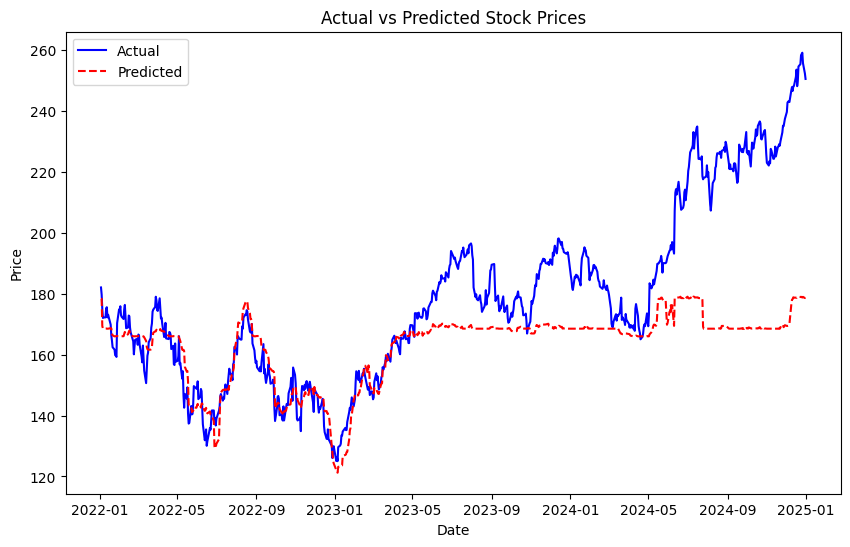

In [2]:
import numpy as np
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.ensemble import RandomForestRegressor

import pandas as pd
import yfinance as yf

# Step 1: Load Stock Data (example: Apple Inc.)
data = yf.download('AAPL', start='2010-01-01', end='2025-01-01')

# Step 2: Calculate Daily Price Change
data['Price Change'] = data['Close'].diff()

# Step 3: Separate Gains and Losses
data['Gain'] = data['Price Change'].where(data['Price Change'] > 0, 0)
data['Loss'] = -data['Price Change'].where(data['Price Change'] < 0, 0)

# Step 4: Calculate the Average Gain and Loss over the 14-day window
data['Avg Gain'] = data['Gain'].rolling(window=14).mean()
data['Avg Loss'] = data['Loss'].rolling(window=14).mean()

# Step 5: Calculate the Relative Strength (RS)
data['RS'] = data['Avg Gain'] / data['Avg Loss']

# Step 6: Calculate the RSI
data['RSI'] = 100 - (100 / (1 + data['RS']))
# Step 2: Calculate Technical Indicators
data['SMA'] = data['Close'].rolling(window=14).mean()  # Simple Moving Average

data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()
# Remove NaN values created by rolling or technical indicators
data = data.dropna()

# Print the first few rows to verify
print(data[['Close', 'RSI']].head())

# Step 3: Define Features and Target Variable
X = data[['SMA', 'RSI', 'MACD']]
y = data['Close']

# Step 4: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 5: Train the Model
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# Step 6: Make Predictions
y_pred = model.predict(X_test)

# Step 7: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
# Step 7: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')

# Step 8: Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted', color='red', linestyle='--')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()